In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
type(0)==int
type([])==list


True

[0.01520935] [-0.01007563]


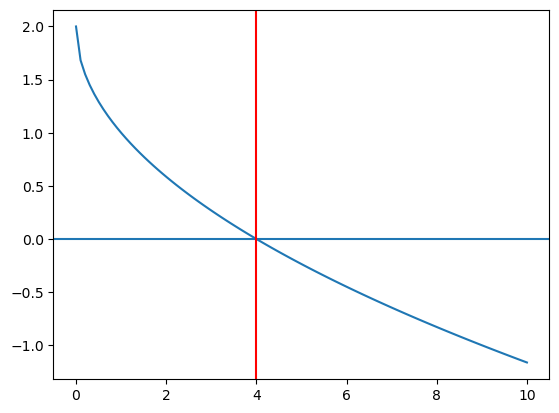

In [3]:
xgrid = np.linspace(0, 10, 100)  # X-coordinates
zgrid = - np.sqrt(xgrid) + 2  # Z-coordinates

# Find the indices where the line crosses zero

# zero_crossings = np.where(np.diff(np.sign(zgrid)))[0]

fig, ax = plt.subplots()

ax.plot(xgrid, zgrid)

# ax.scatter(zero_crossings[0], zero_crossings[1], color='r')

ax.axhline(0)

idx = np.where(np.diff(np.sign(zgrid)))[0]

print(zgrid[idx], zgrid[idx+1])

x1, x2 = xgrid[idx], xgrid[idx+1]
z1, z2 = zgrid[idx], zgrid[idx+1]

x_intersection = x1 + (0 - z1)/(z2 - z1) * (x2 - x1)

ax.axvline(x_intersection, color='r')



In [4]:
xgr = np.loadtxt('x.grd')
zgr = np.loadtxt('bed.dep')

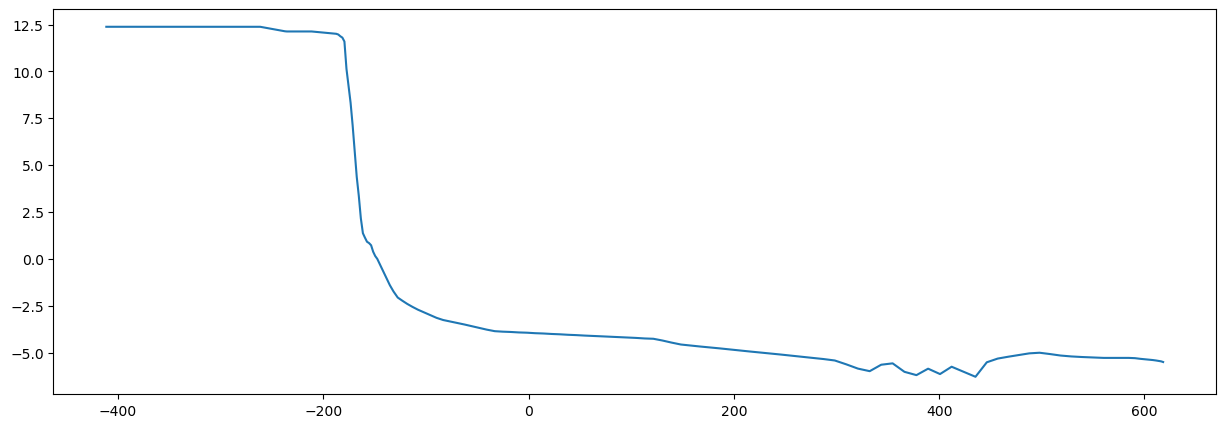

In [5]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr, zgr)

# ax.set_aspect('equal')

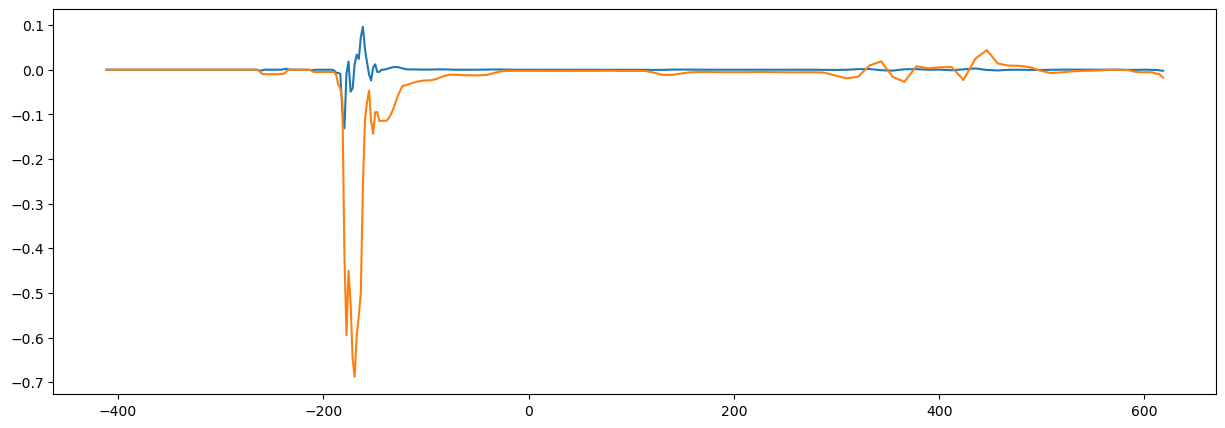

In [6]:
angles = np.gradient(zgr, xgr)
double_angles = np.gradient(angles, xgr)

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr, double_angles)
ax.plot(xgr, angles)

In [7]:
mask = (xgr > -200) * (xgr < -100)

print(angles[mask])

[-0.005      -0.00525    -0.00525    -0.005      -0.00525    -0.00525
 -0.012      -0.03275    -0.0415     -0.07025    -0.417      -0.59525
 -0.45075    -0.52175    -0.6475     -0.688      -0.59425    -0.55225
 -0.4985     -0.25825    -0.11375    -0.07225    -0.047      -0.11525
 -0.1435     -0.095      -0.095      -0.11456625 -0.11461873 -0.11448381
 -0.11443466 -0.10512538 -0.08700357 -0.05894502 -0.03669308 -0.03341899
 -0.02967889 -0.02625884 -0.02413131]


These methods don't seem that consistent

In [8]:
p1 = np.array((xgr[0], zgr[0]))
p2 = np.array((xgr[-1], zgr[-1]))

distances = np.zeros(xgr.shape)

for i in range(len(xgr)):
    
    p3 = np.array((xgr[i], zgr[i]))
        
    distances[i] = np.cross(p2-p1, p3-p1) / np.linalg.norm(p2-p1)
    
    if zgr[i] < xgr[i] * (zgr[-1] - zgr[0]) / (xgr[-1] - xgr[0]) + zgr[0]:
        distances[i] *= -1
    
bluff_edge_id = np.argmax(distances)
shore_line_id = np.argmin(distances)

bluff_edge_point = np.array((xgr[bluff_edge_id], zgr[bluff_edge_id]))
shore_line_point = np.array((xgr[shore_line_id], zgr[shore_line_id]))

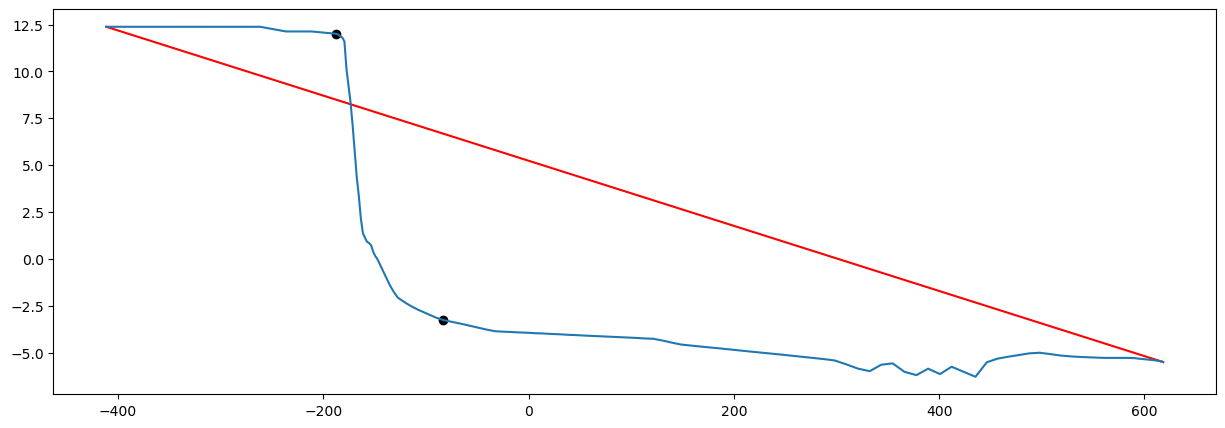

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='r')
ax.plot(xgr, zgr)

ax.scatter(bluff_edge_point[0], bluff_edge_point[1], color='k')
ax.scatter(shore_line_point[0], shore_line_point[1], color='k')

In [14]:
conditions = np.zeros(10, dtype=int)

mask = np.zeros(conditions.shape, dtype=int)

mask[[2, 4, 8]] = 1

print(mask)

conditions[mask] = 1

print(conditions)

[0 0 1 0 1 0 0 0 1 0]
[1 1 0 0 0 0 0 0 0 0]
